## Drag Reduction Prediction Research

In [1]:
%matplotlib notebook
import numpy as np
from numpy import percentile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from statsmodels.nonparametric.kde import KDEUnivariate

In [2]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [3]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [4]:
# Importing the required data

filename = "pl2.xlsx"
data1 = pd.read_excel(filename)
data1.head()

,Tb (deg C),Q(lit/hr),C(ppm),T,D(mm),ε/D,Oil density,n,Re,k(kg/ms(2-n)),Measured DR
0,163.2,1378.115022,150,4,0.0254,0.0059,940,0.719,2573.769107,0.0305,12.554463
1,163.2,2038.798945,150,4,0.0254,0.0059,940,0.719,4250.632001,0.0305,17.295665
2,163.2,2616.464431,150,4,0.0254,0.0059,940,0.719,5851.101133,0.0305,19.525800
3,163.2,3088.633349,150,4,0.0254,0.0059,940,0.719,7236.617256,0.0305,23.629062
4,163.2,1364.721309,150,15,0.0254,0.0059,919,0.725,4451.331141,0.0165,21.997945


data= data1.drop(['n','Q(lit/hr)'], axis=1)

In [5]:
data= data1.drop(['Re','T'], axis=1)

In [6]:
#data= data1

In [7]:
data.head()

,Tb (deg C),Q(lit/hr),C(ppm),D(mm),ε/D,Oil density,n,k(kg/ms(2-n)),Measured DR
0,163.2,1378.115022,150,0.0254,0.0059,940,0.719,0.0305,12.554463
1,163.2,2038.798945,150,0.0254,0.0059,940,0.719,0.0305,17.295665
2,163.2,2616.464431,150,0.0254,0.0059,940,0.719,0.0305,19.525800
3,163.2,3088.633349,150,0.0254,0.0059,940,0.719,0.0305,23.629062
4,163.2,1364.721309,150,0.0254,0.0059,919,0.725,0.0165,21.997945


<IPython.core.display.Javascript object>


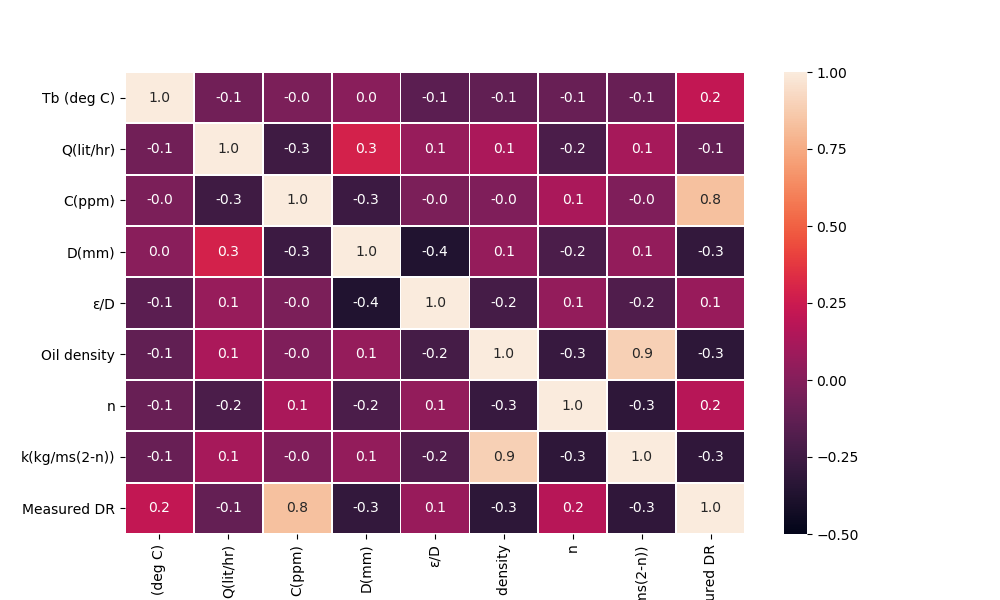

In [84]:
# Calculate correlations
%matplotlib notebook
corr = data.corr()
f,ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data = corr, vmin=-0.5, vmax=1, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

f.savefig("foo.png", bbox_inches='tight', dpi=600)

<IPython.core.display.Javascript object>


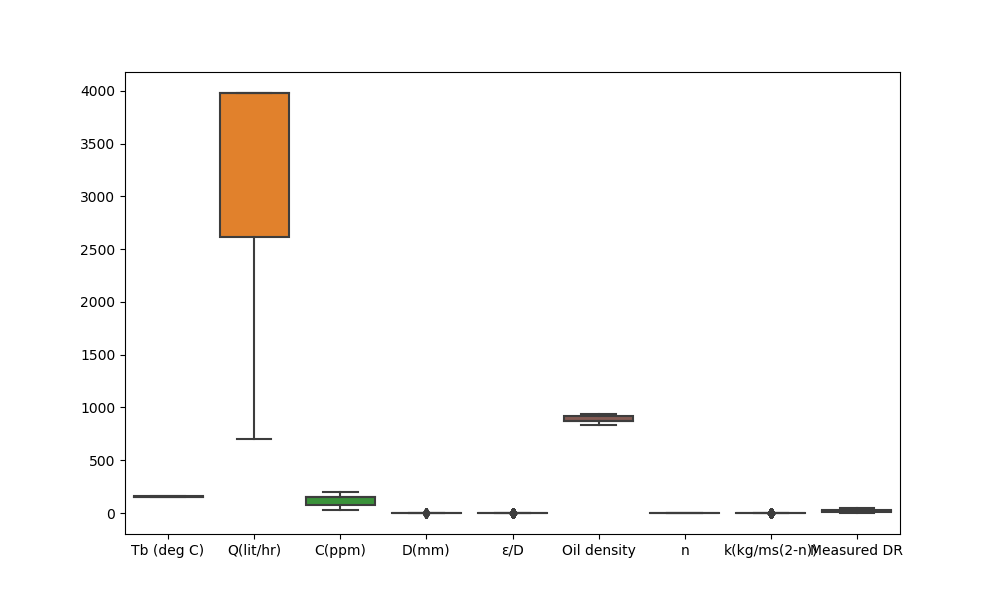

In [9]:
# Display

%matplotlib notebook

f,ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=data, ax=ax)

In [10]:
# Description

data.describe()

,Tb (deg C),Q(lit/hr),C(ppm),D(mm),ε/D,Oil density,n,k(kg/ms(2-n)),Measured DR
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,154.465432,3290.071655,118.518519,0.024930,0.006537,878.666667,0.734296,0.015815,18.447855
std,7.024542,888.112250,61.430040,0.002402,0.002817,36.061866,0.013331,0.006527,12.286854
min,147.300000,705.716254,25.000000,0.012700,0.001800,834.000000,0.719000,0.009500,0.832074
25%,147.300000,2620.000000,75.000000,0.025400,0.005900,868.000000,0.721000,0.014000,7.088939
50%,150.800000,3980.000000,150.000000,0.025400,0.005900,868.000000,0.725000,0.014000,17.009804
75%,163.200000,3980.000000,150.000000,0.025400,0.005900,919.000000,0.748000,0.016500,28.110220
max,163.200000,3980.000000,200.000000,0.025400,0.011800,940.000000,0.748000,0.030500,48.345596


In [11]:
# Data Assignment

Output = data.iloc[:,-1]
Features = data.iloc[:, 0:-1]
TotalInputs = Features.values
TotalTarget = Output.values

In [12]:
# Data Assignment for training and Validation sets

MainInputs, ValidationInputs, MainTarget, ValidationTarget = train_test_split(TotalInputs, TotalTarget, test_size=0.2, random_state=42)


In [13]:
X = MainInputs
y = MainTarget

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=0)

### Linear Regression 

In [15]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression().fit(X_train, y_train)


TrainOutput_linreg = linreg.predict(X_train)
TestOutput_linreg = linreg.predict(X_test)
ValidationOutput_linreg = linreg.predict(ValidationInputs)

In [16]:
R2_train_linreg = r2_score(y_train, TrainOutput_linreg)
R2_test_linreg = r2_score(y_test,TestOutput_linreg)
R2_valid_linreg = r2_score(ValidationTarget,ValidationOutput_linreg)


MSE_train_linreg = mean_squared_error(y_train, TrainOutput_linreg)
MSE_test_linreg = mean_squared_error(y_test, TestOutput_linreg)
MSE_valid_linreg = mean_squared_error(ValidationTarget, ValidationOutput_linreg)

MAE_train_linreg = mean_absolute_error(y_train, TrainOutput_linreg)
MAE_test_linreg = mean_absolute_error(y_test, TestOutput_linreg)
MAE_valid_linreg = mean_absolute_error(ValidationTarget, ValidationOutput_linreg)


print("------------------------------LINEAR REGRESSION--------------------------------------")
print("R2: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(R2_train_linreg ,R2_test_linreg,R2_valid_linreg))
print("MSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MSE_train_linreg,MSE_test_linreg ,MSE_valid_linreg))
print("RMSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(np.sqrt(MSE_train_linreg),np.sqrt(MSE_test_linreg),np.sqrt(MSE_valid_linreg)))
print("MAE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MAE_train_linreg,MAE_test_linreg,MAE_valid_linreg))

------------------------------LINEAR REGRESSION--------------------------------------
R2: [Train: 0.875, Test: 0.886 and Validation: 0.809
MSE: [Train: 18.970, Test: 20.527 and Validation: 22.426
RMSE: [Train: 4.355, Test: 4.531 and Validation: 4.736
MAE: [Train: 3.373, Test: 3.516 and Validation: 3.604


In [17]:
from sklearn.model_selection import cross_val_score

scores_linreg = cross_val_score(linreg, X, y, scoring="r2", cv=5)

print('Cross Validation Score\n')
display_scores(scores_linreg)

Cross Validation Score

Scores: [0.90377842 0.84830906 0.90526602 0.79441475 0.86245308]
Mean: 0.863
Std: 0.041


## Ridge Regression 

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

#X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
X_val_scaled = scaler.transform(ValidationInputs)

linridge = Ridge(alpha=1).fit(X_train_scaled, y_train)


TrainOutput_linridge = linridge.predict(X_train_scaled) 
TestOutput_linridge = linridge.predict(X_test_scaled) 
ValidationOutput_linridge = linridge.predict(X_val_scaled)


In [19]:
R2_train_linridge = r2_score(y_train, TrainOutput_linridge)
R2_test_linridge = r2_score(y_test,TestOutput_linridge)
R2_valid_linridge = r2_score(ValidationTarget,ValidationOutput_linridge)


MSE_train_linridge = mean_squared_error(y_train, TrainOutput_linridge)
MSE_test_linridge = mean_squared_error(y_test, TestOutput_linridge)
MSE_valid_linridge = mean_squared_error(ValidationTarget, ValidationOutput_linridge)

MAE_train_linridge = mean_absolute_error(y_train, TrainOutput_linridge)
MAE_test_linridge = mean_absolute_error(y_test, TestOutput_linridge)
MAE_valid_linridge = mean_absolute_error(ValidationTarget, ValidationOutput_linridge)


print("------------------------------RIDGE REGRESSION--------------------------------------")
print("R2: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(R2_train_linridge ,R2_test_linridge,R2_valid_linridge))
print("MSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MSE_train_linridge,MSE_test_linridge,MSE_valid_linridge))
print("RMSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(np.sqrt(MSE_train_linridge),np.sqrt(MSE_test_linridge),np.sqrt(MSE_valid_linridge)))
print("MAE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MAE_train_linridge,MAE_test_linridge,MAE_valid_linridge))


------------------------------RIDGE REGRESSION--------------------------------------
R2: [Train: 0.873, Test: 0.881 and Validation: 0.815
MSE: [Train: 19.247, Test: 21.544 and Validation: 21.770
RMSE: [Train: 4.387, Test: 4.642 and Validation: 4.666
MAE: [Train: 3.416, Test: 3.641 and Validation: 3.531


In [20]:
from sklearn.model_selection import cross_val_score

scores_ridge = cross_val_score(linridge, X, y, scoring="r2", cv=5)

display_scores(scores_ridge)

Scores: [0.90359492 0.85166022 0.87738614 0.78770529 0.86294378]
Mean: 0.857
Std: 0.039


### KNN Regression

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 4).fit(X_train, y_train)

TrainOutput_knn = knnreg.predict(X_train)
TestOutput_knn = knnreg.predict(X_test)
ValidationOutput_knn = knnreg.predict(ValidationInputs)


In [22]:
R2_train_knn = r2_score(y_train, TrainOutput_knn)
R2_test_knn = r2_score(y_test,TestOutput_knn)
R2_valid_knn = r2_score(ValidationTarget,ValidationOutput_knn)


MSE_train_knn = mean_squared_error(y_train, TrainOutput_knn)
MSE_test_knn = mean_squared_error(y_test, TestOutput_knn)
MSE_valid_knn = mean_squared_error(ValidationTarget, ValidationOutput_knn)

MAE_train_knn = mean_absolute_error(y_train, TrainOutput_knn)
MAE_test_knn = mean_absolute_error(y_test, TestOutput_knn)
MAE_valid_knn = mean_absolute_error(ValidationTarget, ValidationOutput_knn)


print("------------------------------KNN REGRESSION--------------------------------------")
print("R2: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(R2_train_knn ,R2_test_knn,R2_valid_knn))
print("MSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MSE_train_knn,MSE_test_knn,MSE_valid_knn))
print("RMSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(np.sqrt(MSE_train_knn),np.sqrt(MSE_test_knn),np.sqrt(MSE_valid_knn)))
print("MAE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MAE_train_knn,MAE_test_knn,MAE_valid_knn))


------------------------------KNN REGRESSION--------------------------------------
R2: [Train: 0.892, Test: 0.894 and Validation: 0.765
MSE: [Train: 16.385, Test: 19.246 and Validation: 27.682
RMSE: [Train: 4.048, Test: 4.387 and Validation: 5.261
MAE: [Train: 2.768, Test: 2.815 and Validation: 3.935


In [23]:
grid_values = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}

# default metric to optimize over grid parameters: accuracy
grid_knn = GridSearchCV(knnreg, param_grid = grid_values, scoring='neg_mean_squared_error')
grid_knn.fit(X_train, y_train)


report_best_scores(grid_knn.cv_results_, 1)


Model with rank: 1
Mean validation score: -31.368 (std: 3.332)
Parameters: {'n_neighbors': 5}



In [24]:
from sklearn.model_selection import cross_val_score

scores_knn = cross_val_score(knnreg, X, y, scoring="r2", cv=5)

display_scores(scores_knn )

Scores: [0.85442793 0.82662258 0.77706636 0.74856535 0.86616859]
Mean: 0.815
Std: 0.045


### Support Vector Regression

In [25]:
from sklearn.svm import SVR

svr = SVR(gamma=100000, kernel = 'rbf', C=100000.0)

svr.fit(X_train, y_train)

TrainOutput_svr = svr.predict(X_train)
TestOutput_svr = svr.predict(X_test)
ValidationOutput_svr = svr.predict(ValidationInputs)

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

svr = SVR(gamma=100000, kernel = 'rbf', C=100000.0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(ValidationInputs)

svr.fit(X_train_scaled, y_train)

TrainOutput_svr = svr.predict(X_train_scaled)
TestOutput_svr = svr.predict(X_test_scaled)
ValidationOutput_svr = svr.predict(X_val_scaled)

In [26]:
R2_train_svr = r2_score(y_train, TrainOutput_svr)
R2_test_svr = r2_score(y_test,TestOutput_svr)
R2_valid_svr = r2_score(ValidationTarget,ValidationOutput_svr)


MSE_train_svr = mean_squared_error(y_train, TrainOutput_svr)
MSE_test_svr = mean_squared_error(y_test, TestOutput_svr)
MSE_valid_svr = mean_squared_error(ValidationTarget, ValidationOutput_svr)

MAE_train_svr = mean_absolute_error(y_train, TrainOutput_svr)
MAE_test_svr = mean_absolute_error(y_test, TestOutput_svr)
MAE_valid_svr = mean_absolute_error(ValidationTarget, ValidationOutput_svr)


print("------------------------------SVR REGRESSION--------------------------------------")
print("R2: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(R2_train_svr ,R2_test_svr,R2_valid_svr))
print("MSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MSE_train_svr,MSE_test_svr,MSE_valid_svr))
print("RMSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(np.sqrt(MSE_train_svr),np.sqrt(MSE_test_svr),np.sqrt(MSE_valid_svr)))
print("MAE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MAE_train_svr,MAE_test_svr,MAE_valid_svr))

------------------------------SVR REGRESSION--------------------------------------
R2: [Train: 0.997, Test: 0.323 and Validation: 0.092
MSE: [Train: 0.440, Test: 122.317 and Validation: 106.827
RMSE: [Train: 0.663, Test: 11.060 and Validation: 10.336
MAE: [Train: 0.187, Test: 9.120 and Validation: 8.101


In [27]:
params = {
    "C": [1, 100000],
 #   "degree": [2, 4],
  #  "kernel": ['rbf', 'linear', 'poly','sigmoid'], 
    "gamma": [0, 100000], 
    #"epsilon": [0.1, 0.5],
}

grid_svr = GridSearchCV(svr, param_grid = params, scoring='r2')
grid_svr.fit(X_train, y_train)

report_best_scores(grid_svr.cv_results_, 1)


Model with rank: 1
Mean validation score: 0.216 (std: 0.022)
Parameters: {'C': 100000, 'gamma': 100000}



In [28]:
from sklearn.model_selection import cross_val_score

scores_svr = cross_val_score(svr, X, y, scoring="r2", cv=5)

print('Cross Validation Score\n')
display_scores(scores_svr)

Cross Validation Score

Scores: [0.4103581  0.41703625 0.33339275 0.2096926  0.28784193]
Mean: 0.332
Std: 0.078


### AdaBoost SVR

In [29]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(base_estimator = svr, random_state=0, n_estimators=500,loss = 'exponential')

adaboost.fit(X_train, y_train)

TrainOutput_adas = adaboost.predict(X_train)
TestOutput_adas = adaboost.predict(X_test)
ValidationOutput_adas = adaboost.predict(ValidationInputs)

from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(base_estimator = svr, random_state=0, n_estimators=500,loss = 'exponential')

adaboost.fit(X_train_scaled, y_train)

TrainOutput_adas = adaboost.predict(X_train_scaled)
TestOutput_adas = adaboost.predict(X_test_scaled)
ValidationOutput_adas = adaboost.predict(X_val_scaled)



In [30]:
R2_train_adas = r2_score(y_train, TrainOutput_adas)
R2_test_adas = r2_score(y_test,TestOutput_adas)
R2_valid_adas = r2_score(ValidationTarget,ValidationOutput_adas)


MSE_train_adas = mean_squared_error(y_train, TrainOutput_adas)
MSE_test_adas = mean_squared_error(y_test, TestOutput_adas)
MSE_valid_adas = mean_squared_error(ValidationTarget, ValidationOutput_adas)

MAE_train_adas = mean_absolute_error(y_train, TrainOutput_adas)
MAE_test_adas = mean_absolute_error(y_test, TestOutput_adas)
MAE_valid_adas = mean_absolute_error(ValidationTarget, ValidationOutput_adas)


print("------------------------------ADABOOST SVR--------------------------------------")
print("R2: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(R2_train_adas ,R2_test_adas,R2_valid_adas))
print("MSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MSE_train_adas,MSE_test_svr,MSE_valid_adas))
print("RMSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(np.sqrt(MSE_train_adas),np.sqrt(MSE_test_adas),np.sqrt(MSE_valid_adas)))
print("MAE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MAE_train_adas,MAE_test_adas,MAE_valid_adas))

------------------------------ADABOOST SVR--------------------------------------
R2: [Train: 0.974, Test: 0.313 and Validation: 0.091
MSE: [Train: 3.940, Test: 122.317 and Validation: 106.898
RMSE: [Train: 1.985, Test: 11.143 and Validation: 10.339
MAE: [Train: 1.066, Test: 9.318 and Validation: 8.243


### Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor(max_depth=50, max_features = "auto" ,splitter = 'random',presort = True)

dtr_model.fit(X_train, y_train)

TrainOutput_dtr = dtr_model.predict(X_train)
TestOutput_dtr = dtr_model.predict(X_test)
ValidationOutput_dtr = dtr_model.predict(ValidationInputs)

In [32]:
R2_train_dtr = r2_score(y_train, TrainOutput_dtr)
R2_test_dtr = r2_score(y_test,TestOutput_dtr)
R2_valid_dtr = r2_score(ValidationTarget,ValidationOutput_dtr)


MSE_train_dtr = mean_squared_error(y_train, TrainOutput_dtr)
MSE_test_dtr = mean_squared_error(y_test, TestOutput_dtr)
MSE_valid_dtr = mean_squared_error(ValidationTarget, ValidationOutput_dtr)

MAE_train_dtr = mean_absolute_error(y_train, TrainOutput_dtr)
MAE_test_dtr = mean_absolute_error(y_test, TestOutput_dtr)
MAE_valid_dtr = mean_absolute_error(ValidationTarget, ValidationOutput_dtr)


print("------------------------------DECISION TREE REGRESSION--------------------------------------")
print("R2: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(R2_train_dtr ,R2_test_dtr,R2_valid_dtr))
print("MSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MSE_train_dtr,MSE_test_dtr,MSE_valid_dtr))
print("RMSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(np.sqrt(MSE_train_dtr),np.sqrt(MSE_test_dtr),np.sqrt(MSE_valid_dtr)))
print("MAE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MAE_train_dtr,MAE_test_dtr,MAE_valid_dtr))


------------------------------DECISION TREE REGRESSION--------------------------------------
R2: [Train: 0.999, Test: 0.919 and Validation: 0.898
MSE: [Train: 0.225, Test: 14.615 and Validation: 11.980
RMSE: [Train: 0.475, Test: 3.823 and Validation: 3.461
MAE: [Train: 0.104, Test: 2.669 and Validation: 2.563


### AdaBoost Decision Tree

In [33]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(base_estimator = dtr_model, random_state=0, n_estimators=1000,loss = 'exponential', learning_rate=0.1)

adaboost.fit(X_train, y_train)

TrainOutput_adad = adaboost.predict(X_train)
TestOutput_adad = adaboost.predict(X_test)
ValidationOutput_adad = adaboost.predict(ValidationInputs)

In [34]:
R2_train_adad = r2_score(y_train, TrainOutput_adad)
R2_test_adad = r2_score(y_test,TestOutput_adad)
R2_valid_adad = r2_score(ValidationTarget,ValidationOutput_adad)


MSE_train_adad = mean_squared_error(y_train, TrainOutput_adad)
MSE_test_adad = mean_squared_error(y_test, TestOutput_adad)
MSE_valid_adad = mean_squared_error(ValidationTarget, ValidationOutput_adad)

MAE_train_adad = mean_absolute_error(y_train, TrainOutput_adad)
MAE_test_adad = mean_absolute_error(y_test, TestOutput_adad)
MAE_valid_adad = mean_absolute_error(ValidationTarget, ValidationOutput_adad)


print("------------------------------ADABOOST DECISION TREE--------------------------------------")
print("R2: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(R2_train_adad ,R2_test_adad,R2_valid_adad))
print("MSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MSE_train_adad,MSE_test_adad,MSE_valid_adad))
print("RMSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(np.sqrt(MSE_train_adad),np.sqrt(MSE_test_adad),np.sqrt(MSE_valid_adad)))
print("MAE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MAE_train_adad,MAE_test_adad,MAE_valid_adad))

------------------------------ADABOOST DECISION TREE--------------------------------------
R2: [Train: 0.993, Test: 0.936 and Validation: 0.901
MSE: [Train: 1.024, Test: 11.492 and Validation: 11.695
RMSE: [Train: 1.012, Test: 3.390 and Validation: 3.420
MAE: [Train: 0.563, Test: 2.340 and Validation: 2.578


In [35]:
AdaBoostRegressor()

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

### XG Boost Regression

In [93]:
from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb

#xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=0)
xgb_model =xgb.XGBRegressor(objective="reg:squarederror", subsample = 0.6, reg_lambda = 0.6, reg_alpha = 0.02, 
                            n_estimators = 1000, min_child_weight = 2, max_depth = 3, learning_rate = 0.1, gamma = 0.8, 
                             colsample_bytree = 0.8) 

xgb_model.fit(X_train, y_train)


TrainOutput_xgb = xgb_model.predict(X_train)
TestOutput_xgb = xgb_model.predict(X_test)
ValidationOutput_xgb = xgb_model.predict(ValidationInputs)

In [94]:
R2_train_xgb = r2_score(y_train, TrainOutput_xgb)
R2_test_xgb = r2_score(y_test,TestOutput_xgb)
R2_valid_xgb = r2_score(ValidationTarget,ValidationOutput_xgb)


MSE_train_xgb = mean_squared_error(y_train, TrainOutput_xgb)
MSE_test_xgb = mean_squared_error(y_test, TestOutput_xgb)
MSE_valid_xgb = mean_squared_error(ValidationTarget, ValidationOutput_xgb)

MAE_train_xgb = mean_absolute_error(y_train, TrainOutput_xgb)
MAE_test_xgb = mean_absolute_error(y_test, TestOutput_xgb)
MAE_valid_xgb = mean_absolute_error(ValidationTarget, ValidationOutput_xgb)


print("------------------------------XG BOOST--------------------------------------")
print("R2: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(R2_train_xgb ,R2_test_xgb,R2_valid_xgb))
print("MSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MSE_train_xgb,MSE_test_xgb,MSE_valid_xgb))
print("RMSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(np.sqrt(MSE_train_xgb),np.sqrt(MSE_test_xgb),np.sqrt(MSE_valid_xgb)))
print("MAE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MAE_train_xgb,MAE_test_xgb,MAE_valid_xgb))

------------------------------XG BOOST--------------------------------------
R2: [Train: 0.994, Test: 0.979 and Validation: 0.956
MSE: [Train: 0.922, Test: 3.833 and Validation: 5.226
RMSE: [Train: 0.960, Test: 1.958 and Validation: 2.286
MAE: [Train: 0.580, Test: 1.254 and Validation: 1.619


In [38]:
from sklearn.model_selection import cross_val_score

scores_xgb = cross_val_score(xgb_model, X, y, scoring="r2", cv=5)

print('Cross Validation Score\n')
display_scores(scores_xgb)

Cross Validation Score

Scores: [0.96711291 0.98035605 0.96144693 0.92202958 0.98409078]
Mean: 0.963
Std: 0.022


Hyper-parameter tuning

params = {
    "colsample_bytree": uniform(0.7, 0.2),
    "gamma": uniform(0, 1),
    "learning_rate": uniform(0.00, 0.5), # default 0.1 
    "max_depth": randint(2, 10), # default 3
    "n_estimators": randint(100, 2000), # default 100
    "subsample": uniform(0.1, 0.7),
    "reg_lambda":uniform(0.1, 1),
    "reg_alpha":uniform(0.1, 1),
    "min_child_weight":randint(1, 15)
}

search_xgb = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200,scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=1, return_train_score=True)

search_xgb.fit(X, y)

report_best_scores(search_xgb.cv_results_, 1)

params = {
    "colsample_bytree": [0.1, 1],
    "gamma": [0, 0.5],
    "learning_rate": [0.03, 0.3], # default 0.1 
    "max_depth": [2, 6], # default 3
    "n_estimators": [2000, 100], # default 100
    "subsample": [0.6, 0.4],
    "reg_lambda": [0.1, 1],
    "reg_alpha": [0.1, 1],
    "min_child_weight": [1, 15]
}

grid_xgb = GridSearchCV(xgb_model, param_grid = params, scoring='neg_mean_squared_error')
grid_xgb.fit(X_train, y_train)

report_best_scores(grid_xgb.cv_results_, 1)


### Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor

#rfg_model = RandomForestRegressor()
rfg_model = RandomForestRegressor(max_depth=10, max_features = 'auto', random_state=0, n_estimators=2000)

rfg_model.fit(X_train, y_train)

TrainOutput_rfg = rfg_model.predict(X_train)
TestOutput_rfg = rfg_model.predict(X_test)
ValidationOutput_rfg = rfg_model.predict(ValidationInputs)

In [40]:
R2_train_rfg = r2_score(y_train, TrainOutput_rfg)
R2_test_rfg = r2_score(y_test,TestOutput_rfg)
R2_valid_rfg = r2_score(ValidationTarget,ValidationOutput_rfg)


MSE_train_rfg = mean_squared_error(y_train, TrainOutput_xgb)
MSE_test_rfg= mean_squared_error(y_test, TestOutput_xgb)
MSE_valid_rfg = mean_squared_error(ValidationTarget, ValidationOutput_xgb)

MAE_train_rfg = mean_absolute_error(y_train, TrainOutput_rfg)
MAE_test_rfg = mean_absolute_error(y_test, TestOutput_rfg)
MAE_valid_rfg = mean_absolute_error(ValidationTarget, ValidationOutput_rfg)


print("------------------------------RANDOM FOREST--------------------------------------")
print("R2: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(R2_train_rfg ,R2_test_rfg,R2_valid_rfg))
print("MSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MSE_train_rfg,MSE_test_rfg,MSE_valid_rfg))
print("RMSE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(np.sqrt(MSE_train_rfg),np.sqrt(MSE_test_rfg),np.sqrt(MSE_valid_rfg)))
print("MAE: [Train: {:.3f}, Test: {:.3f} and Validation: {:.3f}".format(MAE_train_rfg,MAE_test_rfg,MAE_valid_rfg))

------------------------------RANDOM FOREST--------------------------------------
R2: [Train: 0.992, Test: 0.945 and Validation: 0.911
MSE: [Train: 0.922, Test: 3.833 and Validation: 5.226
RMSE: [Train: 0.960, Test: 1.958 and Validation: 2.286
MAE: [Train: 0.753, Test: 2.024 and Validation: 2.265


In [41]:
from sklearn.model_selection import cross_val_score

scores_rfg = cross_val_score(rfg_model, X, y, scoring="r2", cv=5)

display_scores(scores_rfg)

Scores: [0.94891715 0.96183499 0.92525908 0.91374769 0.94624486]
Mean: 0.939
Std: 0.017


params = { 
    "max_depth": randint(2, 10), # default 3
    "n_estimators": randint(100, 2000), # default 100
    "min_samples_split":uniform(1, 5),
    " min_impurity_decrease":uniform(0.1, 1),
    "min_weight_fraction_leaf":randint(1, 15)
}

search_rgf = RandomizedSearchCV(rfg_model, param_distributions=params, random_state=42, n_iter=200,scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=1, return_train_score=True)

search_rfg.fit(X, y)

report_best_scores(search_rfg.cv_results_, 1)

params = {
    "max_depth": [2, 10], # default 3
    "n_estimators": [100, 2000], # default 100
    "min_samples_split":[1, 5],
    " min_impurity_decrease": [0.1, 1],
    "min_weight_fraction_leaf":[1, 15]
}

grid_rfg = GridSearchCV(xgb_model, param_grid = params, scoring='neg_mean_squared_error')
grid_rfg.fit(X_train, y_train)

report_best_scores(grid_rfg.cv_results_, 1)


In [47]:
resulting_trDF = pd.DataFrame()
resulting_trDF['TrainOutput_adad'] = TrainOutput_adad
resulting_trDF['TrainOutput_xgb'] = TrainOutput_xgb
resulting_trDF['TrainOutput_rfg'] = TrainOutput_rfg
export_excel = resulting_trDF.to_excel ('resulting_trDF.xlsx', index = None, header=True) 

In [48]:
resulting_testDF = pd.DataFrame()# you create new dataframe
resulting_testDF['TestOutput_adad'] = TestOutput_adad
resulting_testDF['TestOutput_xgb'] = TestOutput_xgb
resulting_testDF['TestOutput_rfg '] = TestOutput_rfg 
export_excel = resulting_testDF.to_excel ('resulting_testDF.xlsx', index = None, header=True) 

In [49]:
resulting_valDF = pd.DataFrame()# you create new dataframe
resulting_valDF['ValidationOutput_adad'] = ValidationOutput_adad
resulting_valDF['ValidationOutput_xgb'] = ValidationOutput_xgb
resulting_valDF['ValidationOutput_rfg'] = ValidationOutput_rfg
export_excel = resulting_valDF.to_excel ('resulting_valDF.xlsx', index = None, header=True) 

In [67]:
Validation_originalDF = pd.DataFrame(data=ValidationTarget)
export_excel = Validation_originalDF.to_excel ('Validation_originalDF.xlsx', index = None, header=True) 

In [68]:
y_trainDF = pd.DataFrame(data=y_train)
export_excel = y_trainDF.to_excel ('y_train.xlsx', index = None, header=True) 

In [69]:
y_testDF = pd.DataFrame(data=y_test)
export_excel = y_testDF.to_excel ('y_test.xlsx', index = None, header=True) 